# Importing Libraries

In [98]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Importing Data

In [2]:
df = pd.read_csv('/content/Airbnb_data - airbnb_data.csv')

# Data Exploration

In [3]:
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [99]:
#returns a tuple representing of dimensionality of the DataFrame(number of rows and columns).
df.shape

(73369, 29)

In [5]:
# used to access the column labels of a DataFrame
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [100]:
# descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values
df.describe()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
count,7.336900e+04,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.00000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000,73369.000000
mean,1.126632e+07,4.758456,5.695893,0.475501,267.900339,3.112922,1.219589,3.934986,1.136788,0.735747,3.293803,36759.180621,1265.784827,0.999509,0.677520,30.332034,1531.25538,0.262836,728.210825,38.456760,-92.332018,36706.223310,343.500361,21.072646,73.252832,36542.277365,268.754965,1.248266,1.689324
std,6.079859e+06,0.680982,8.579286,0.555111,111.068929,2.084112,0.540102,0.424419,0.853495,0.440938,1.182661,21225.116387,751.169728,0.074571,0.472821,35.691615,886.19843,0.440177,408.188245,3.081626,21.693563,21158.215962,198.674262,37.965074,39.645923,20679.534150,205.067520,0.820351,1.215307
min,3.440000e+02,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.338905,-122.511500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.264175e+06,4.304065,0.000000,0.000000,195.000000,2.000000,1.000000,4.000000,0.000000,0.000000,3.000000,18363.000000,606.000000,1.000000,0.000000,2.000000,770.00000,0.000000,369.000000,34.128587,-118.340798,18377.000000,170.000000,1.000000,80.000000,18509.000000,109.000000,1.000000,1.000000
50%,1.225334e+07,4.700480,0.000000,0.000000,263.000000,2.000000,1.000000,4.000000,1.000000,1.000000,4.000000,36757.000000,1275.000000,1.000000,1.000000,2.000000,1517.00000,0.000000,761.000000,40.664576,-76.993512,36722.000000,332.000000,6.000000,94.000000,36986.000000,219.000000,1.000000,1.000000
75%,1.640097e+07,5.192957,17.000000,1.000000,329.000000,4.000000,1.000000,4.000000,2.000000,1.000000,4.000000,55143.000000,1907.000000,1.000000,1.000000,79.000000,2287.00000,1.000000,1076.000000,40.746639,-73.954354,55028.000000,555.000000,24.000000,99.000000,55465.000000,402.000000,1.000000,2.000000
max,2.123090e+07,6.892642,34.000000,2.000000,1496.000000,16.000000,8.000000,4.000000,4.000000,1.000000,5.000000,73473.000000,2553.000000,2.000000,2.000000,80.000000,3086.00000,1.000000,1370.000000,42.390437,-70.985047,73330.000000,619.000000,605.000000,100.000000,65883.000000,668.000000,10.000000,18.000000


In [7]:
#  provides a concise summary of a DataFrame, including the index dtype, column dtypes, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [8]:
# returns the data types of each column in a DataFrame. This is useful for understanding the structure of your data
df.dtypes

,0
id,int64
log_price,float64
property_type,object
room_type,object
amenities,object
accommodates,int64
bathrooms,float64
bed_type,object
cancellation_policy,object
cleaning_fee,bool


## Checking for the missing value.

In [9]:
# count of missing values for each column in your DataFrame
df.isnull().sum()

,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,200
bed_type,0
cancellation_policy,0
cleaning_fee,0


In [10]:
# find the unique values in a DataFrame column
df["zipcode"].unique()

array(['11201', '10019', '10027', '94117', '20009', '94131', '90292',
       '90015', '94121', '91748', '10009', '90254', '90277', '90804',
       '60622', '2127', '10002', '11226', '91401', '11212', '11411', nan,
       '11374', '90028', '10016', '11225', '90036', '90291', '90046',
       '90026', '94118', '11211', '10003', '60605', '90068', '90057',
       '10021', '20037', '11237', '11233', '60608', '10001', '94127',
       '91403', '11249', '10037', '10011', '10032', '91106', '94107',
       '20018', '90027', '91601', '20001', '10022', '91201', '90013',
       '11217', '91016', '10031', '10014', '11101', '94110', '94134',
       '91501', '10029', '90230', '90039', '11221', '20019', '60647',
       '20020', '10025', '10013', '10040', '91604', '10039', '10038',
       '60614', '20002', '11219', '11222', '90042', '94114', '20008',
       '11238', '20007', '11206', '91208', '11223', '2130', '2114',
       '94103', '91107', '11355', '11220', '91406', '10036', '10024',
       '90004', '1

In [11]:
index= ["host_response_rate","property_type", "room_type","accommodates","bathrooms","bed_type", "cancellation_policy", "cleaning_fee",
       "city","instant_bookable", "beds", "bedrooms", "neighbourhood","first_review", "last_review","zipcode",
       "name","host_since","thumbnail_url", "latitude", "longitude",
        "host_has_profile_pic", "host_identity_verified"]

for i in index:

    print(df[i].value_counts(), "\n")
    print("---------------------------------------------------------------")

host_response_rate
100%    43254
90%      2277
80%      1113
0%        883
50%       611
        ...  
39%         1
23%         1
15%         1
31%         1
21%         1
Name: count, Length: 80, dtype: int64 

---------------------------------------------------------------
property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse

# Data Pre-processing

# Handling Missing Values  

In [12]:
# used for loop to find the number of missing values in our dataset
for column in df.columns:

    if df[column].isnull().sum() != 0:

        print("========================================")
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))


bathrooms :- 200,  dtypes : float64

first_review :- 15864,  dtypes : object

host_has_profile_pic :- 188,  dtypes : object

host_identity_verified :- 188,  dtypes : object

host_response_rate :- 18299,  dtypes : object

host_since :- 188,  dtypes : object

last_review :- 15827,  dtypes : object

neighbourhood :- 6872,  dtypes : object

review_scores_rating :- 16722,  dtypes : float64

thumbnail_url :- 8216,  dtypes : object

zipcode :- 968,  dtypes : object

bedrooms :- 91,  dtypes : float64

beds :- 131,  dtypes : float64


bathrooms

<Axes: xlabel='bathrooms', ylabel='Density'>

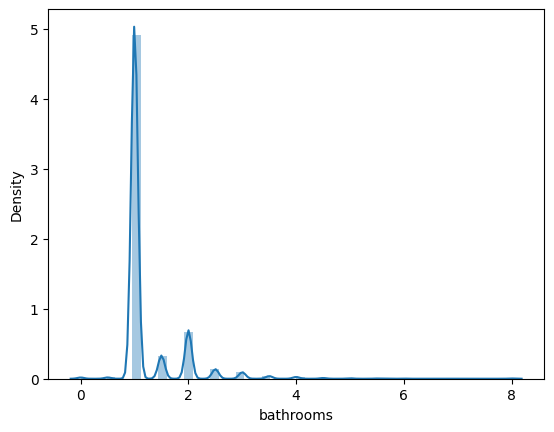

In [13]:
sns.distplot(df["bathrooms"])

In [14]:
# handling missing values by using median
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].median()))

first review

In [15]:
# handling missing values using forward fill
df.first_review.fillna(method="ffill",inplace=True)

host since

In [16]:
# handling missing values using forward fill
df.host_since.fillna(method="ffill",inplace=True)

last review

In [17]:
# handling missing values using forward fill
df.last_review.fillna(method="ffill",inplace=True)

review scores rating

<Axes: xlabel='review_scores_rating', ylabel='Density'>

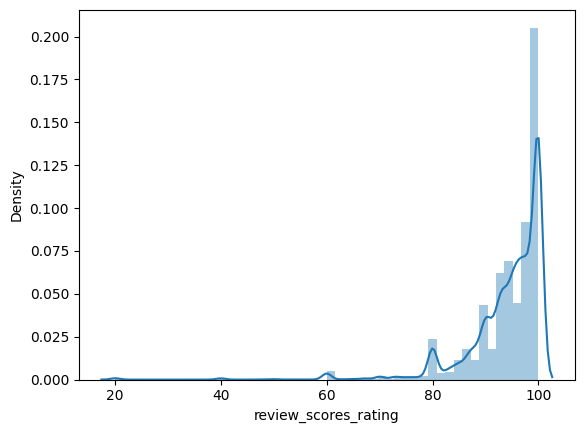

In [18]:
sns.distplot(df["review_scores_rating"])

In [19]:
# handling missing values by replacing with 0
df["review_scores_rating"] = df["review_scores_rating"].fillna(0)

bedrooms

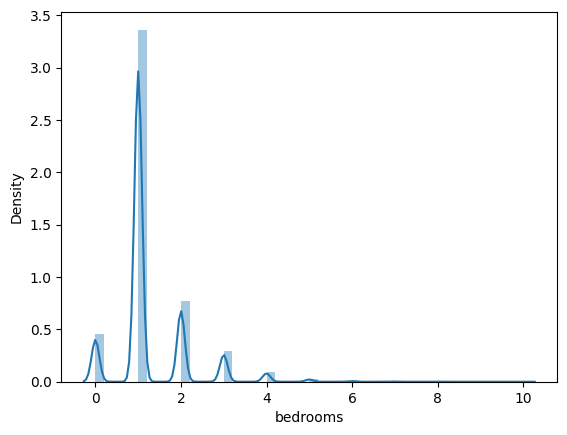

In [20]:
sns.distplot(df["bedrooms"])
plt.show()

In [21]:
# handling missing values using median
df["bedrooms"] = df['bedrooms'].fillna((df["bathrooms"].median()))

beds

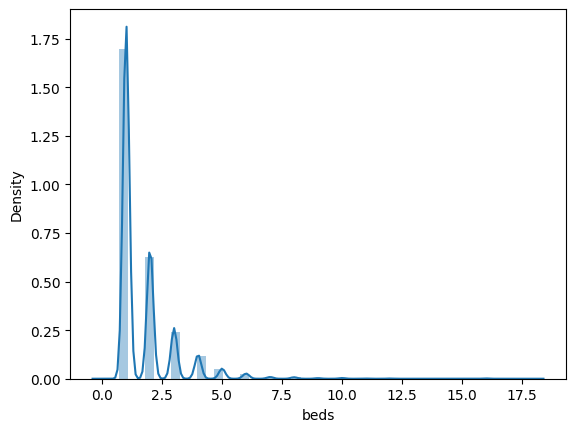

In [22]:
sns.distplot(df["beds"])
plt.show()

In [23]:
# handling missing values using median
df["beds"] = df["beds"].fillna((df["bathrooms"].median()))

Amenties

In [24]:
# converting amenities into list and then counting the numbers of amenities
amenities_count = []
for i in df["amenities"]:
    amenities_count.append(len(i))

df["amenities"] = amenities_count

# Data Visualisation

In [25]:
# Function to plot catplot graphs
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)

# Function to plot catplot graphs
def plot_piechart(h):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    langs = list(df[h].unique())
    students =list(df[h].value_counts())
    ax.pie(students, labels = langs,autopct='%1.2f%%')
    plt.show()

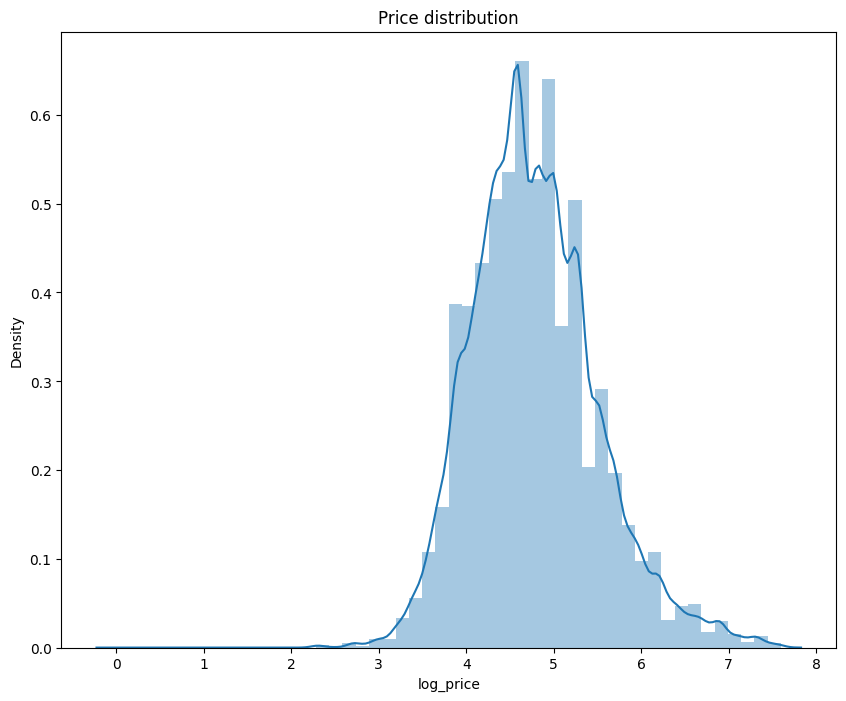

In [26]:
# visualize the distribution of airbnb prices
plt.figure(figsize = (10, 8))
sns.distplot(df["log_price"])
plt.title('Price distribution')
plt.show()

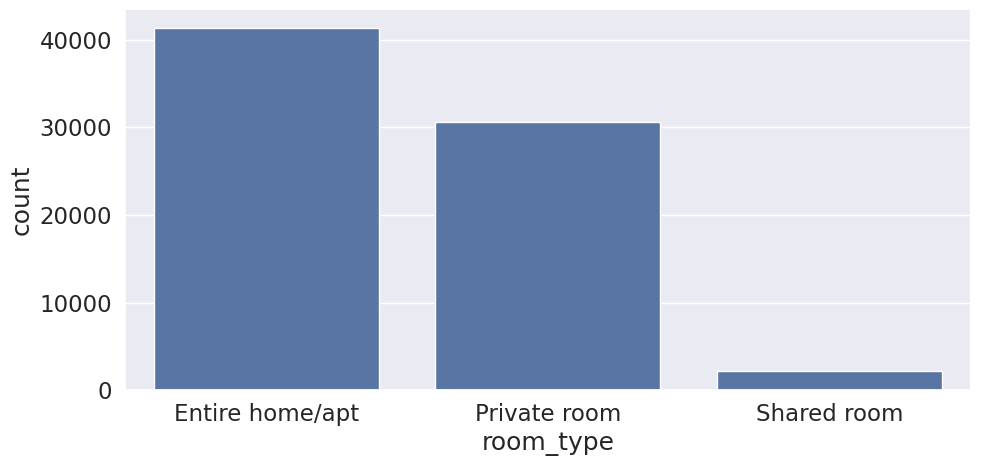

In [27]:
# showing no. of rooms by room type each room type have
plot_catplot("room_type", "count", 5, 2)

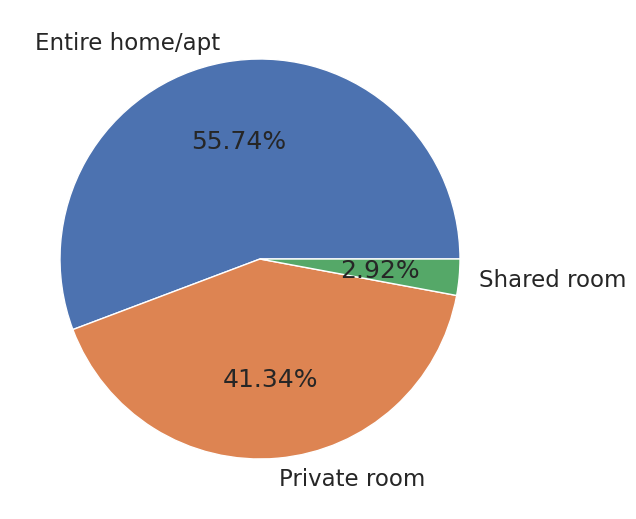

In [28]:
# showing in pie chart the total percenatge each room type have for better info
plot_piechart("room_type")

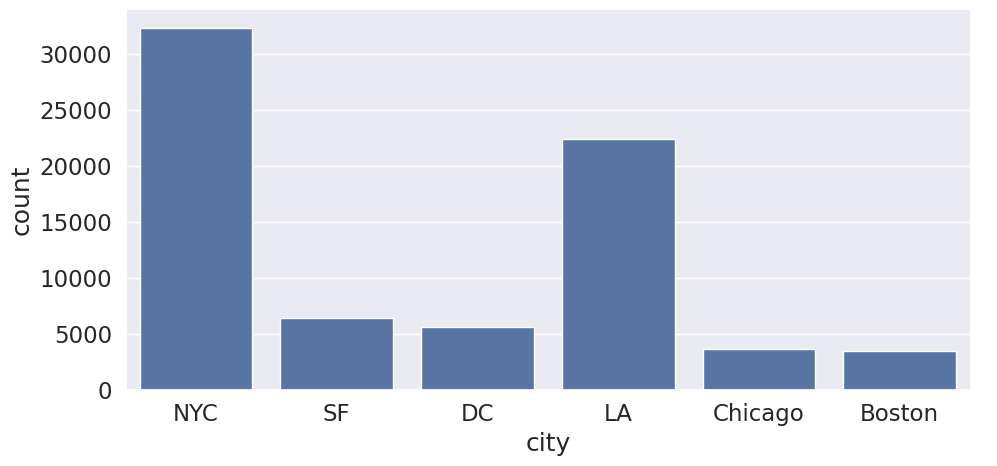

In [29]:
# creating a bar chart to display the counts different city entries in airbnb dataset
plot_catplot("city","count", 5, 2)

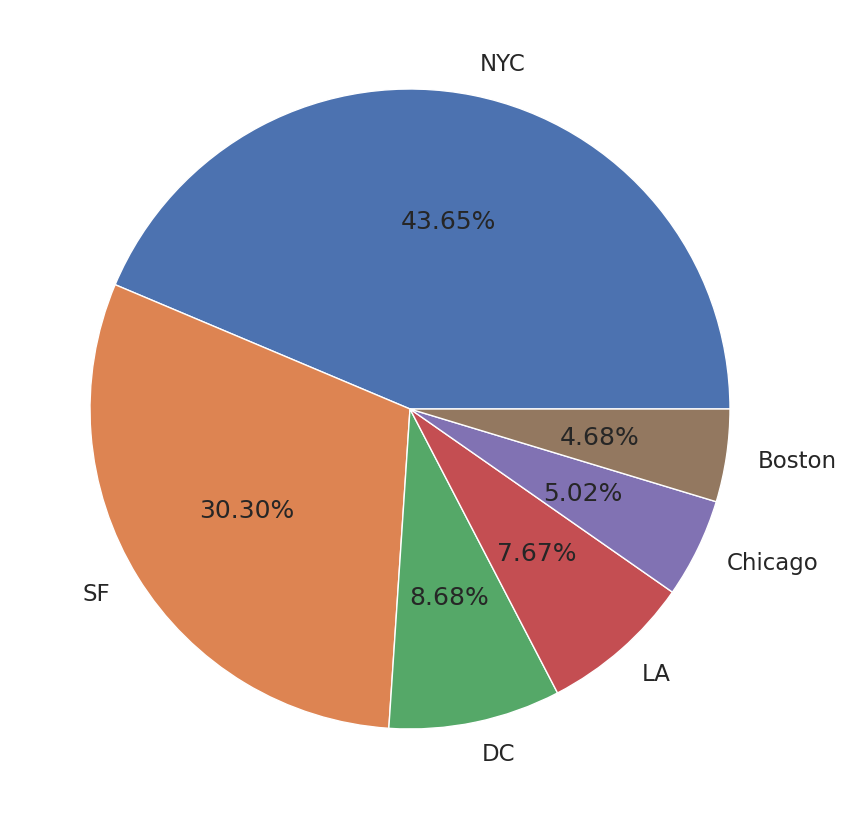

In [30]:
# showing unique city by city counts in percentage
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

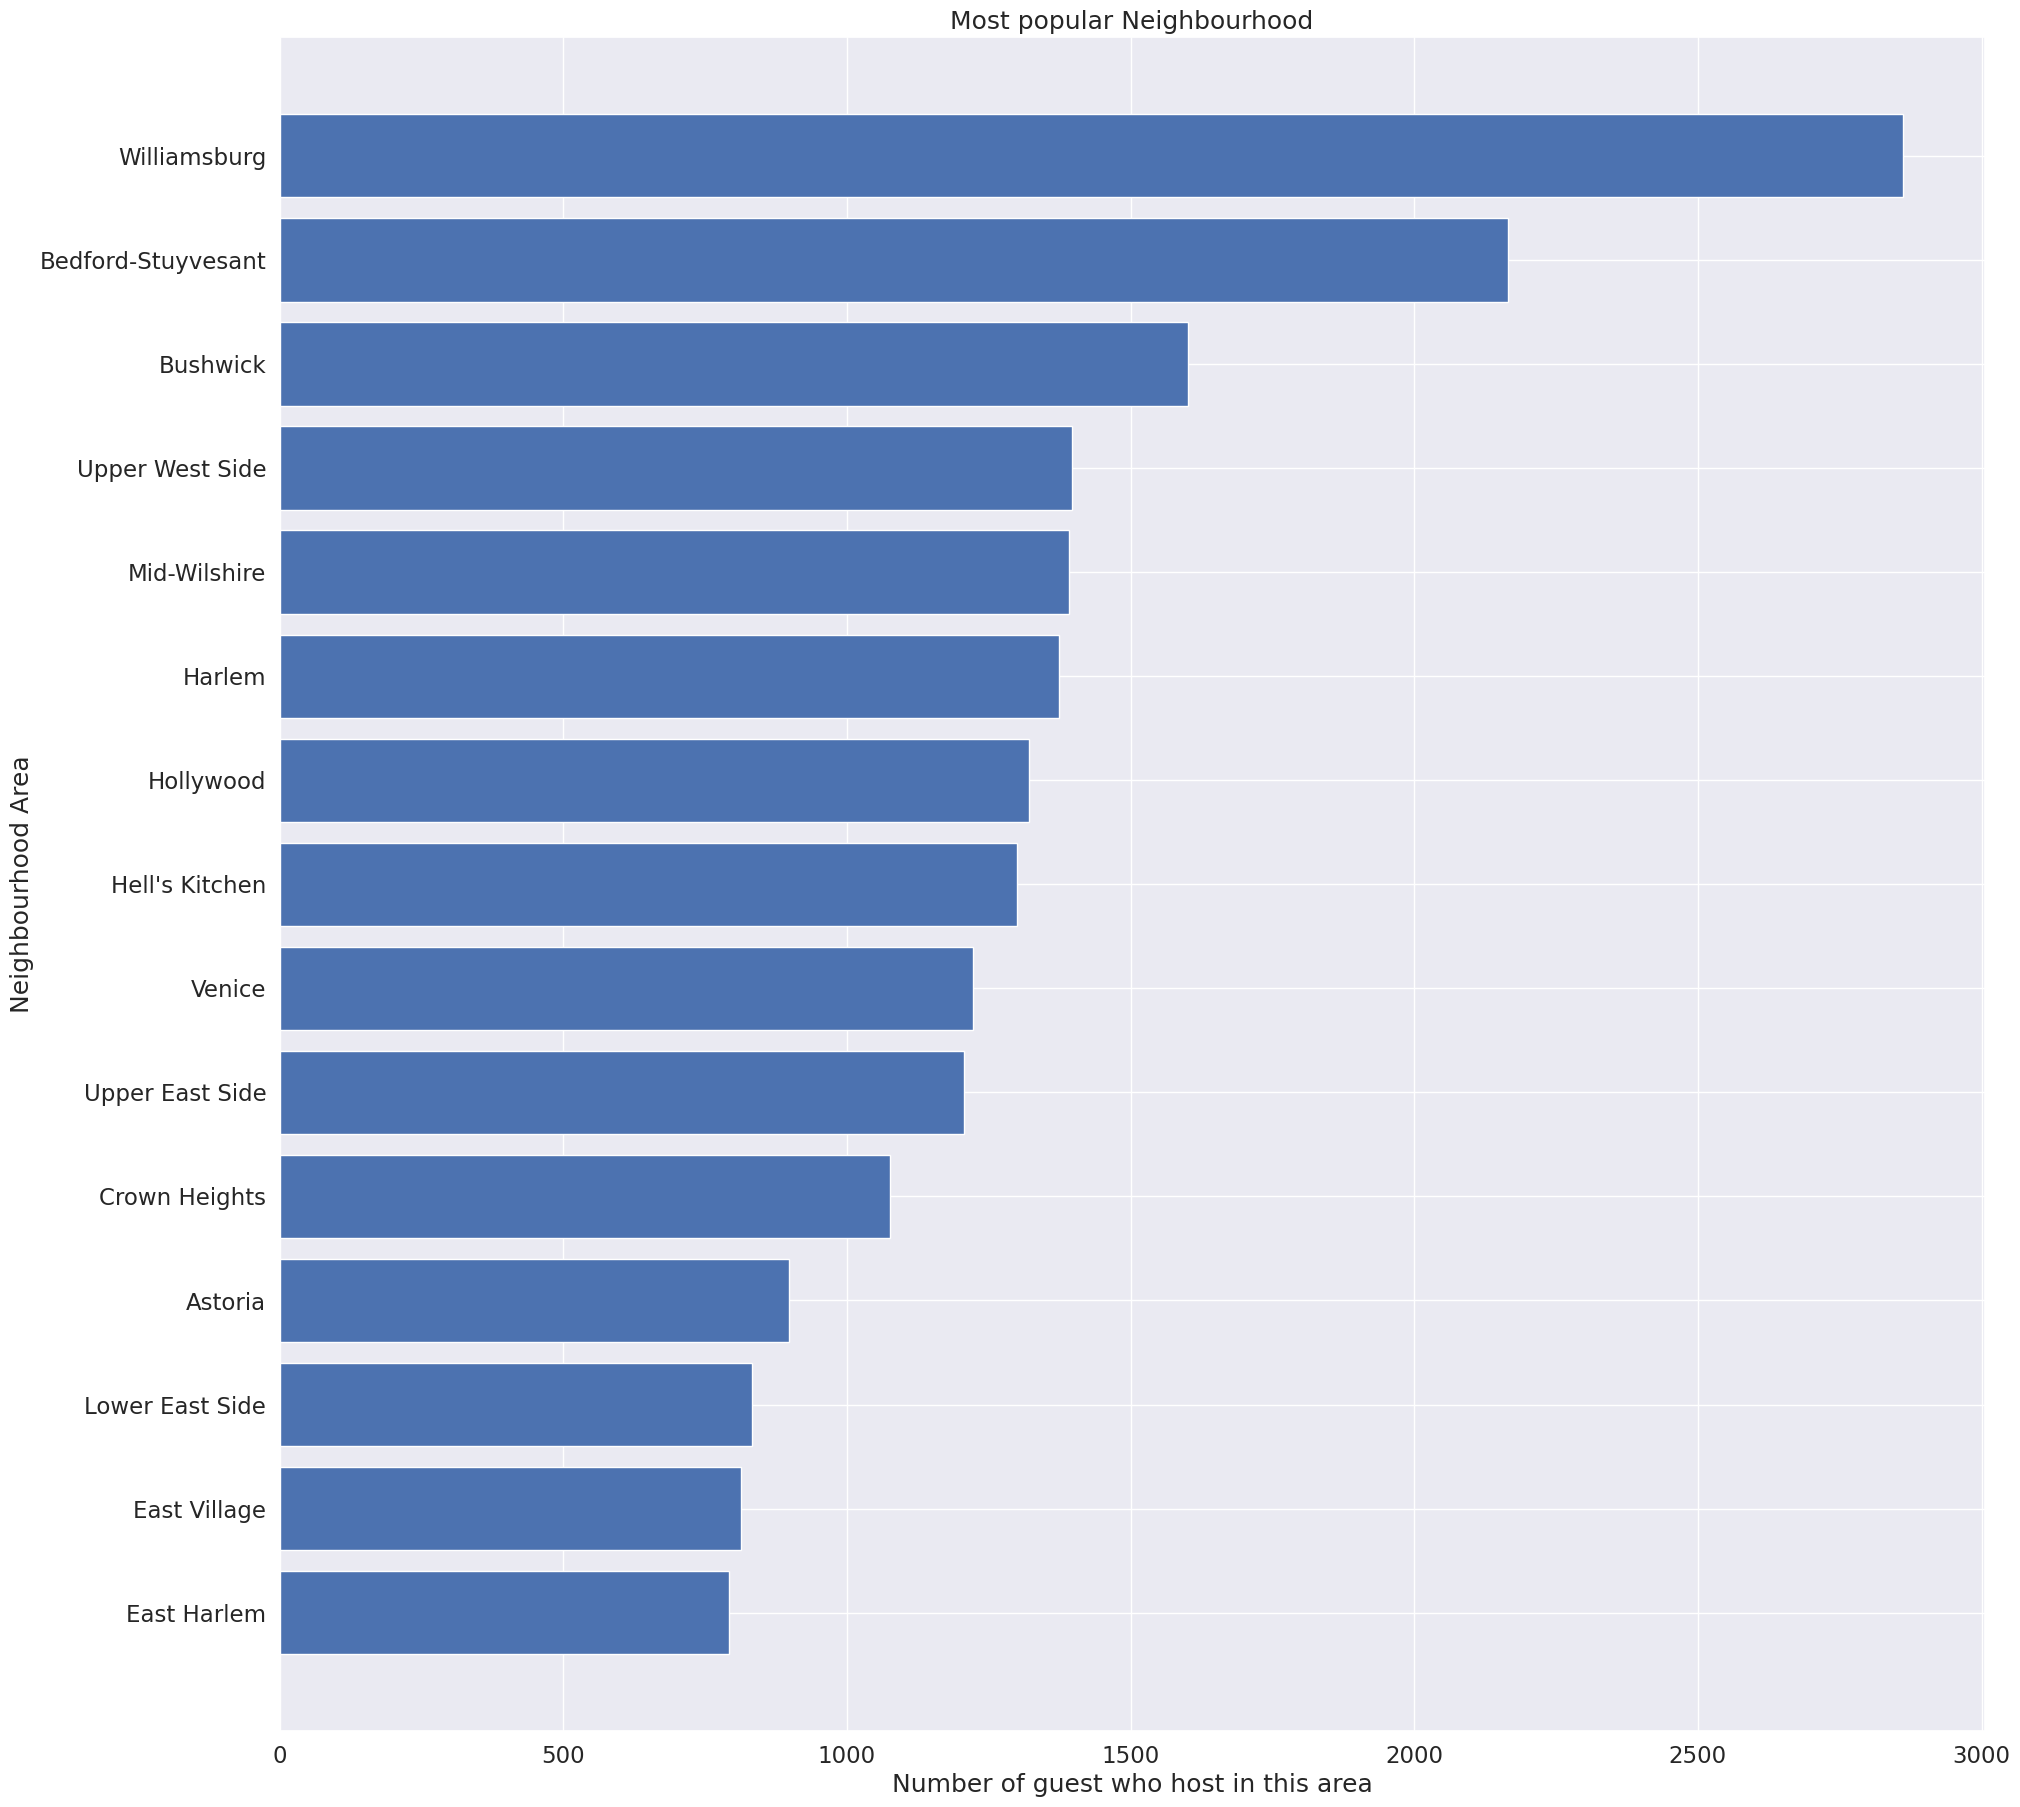

In [31]:
# visualizes popular neighborhoods
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

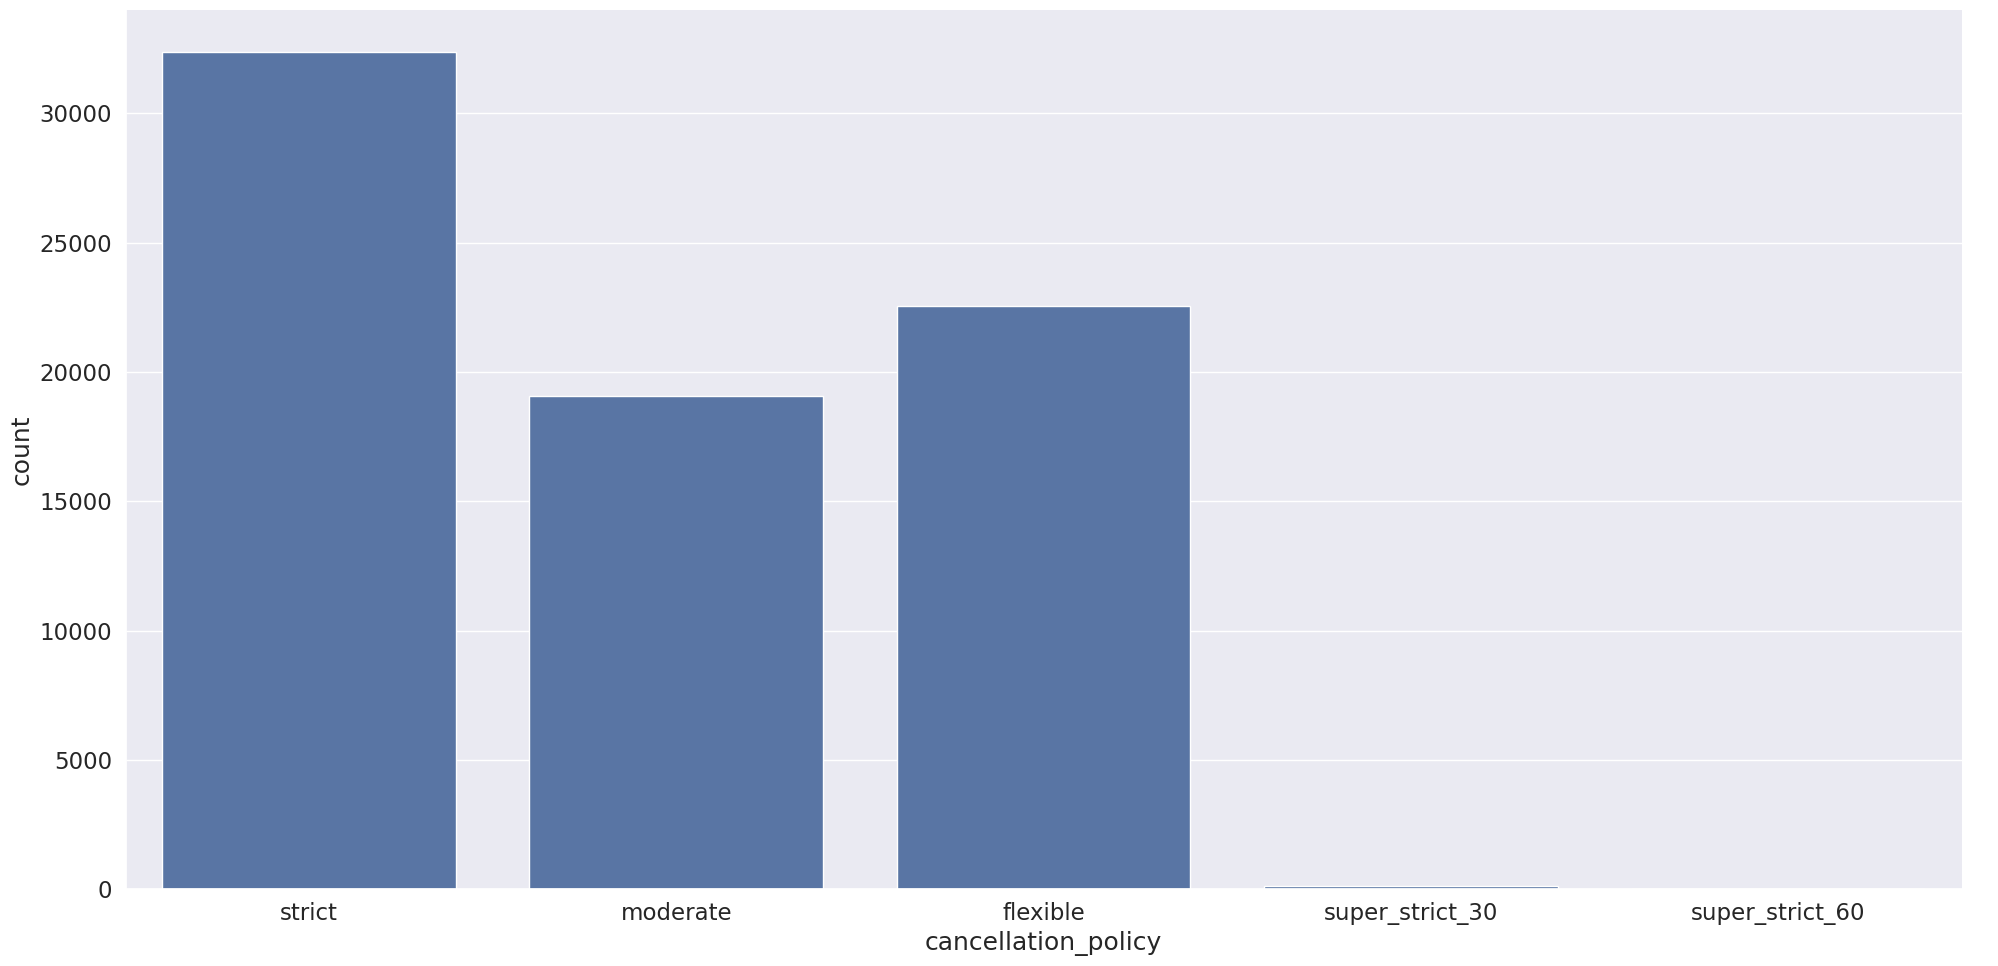

In [32]:
# visualizes each cancellation policy
plot_catplot("cancellation_policy","count",10, 2)

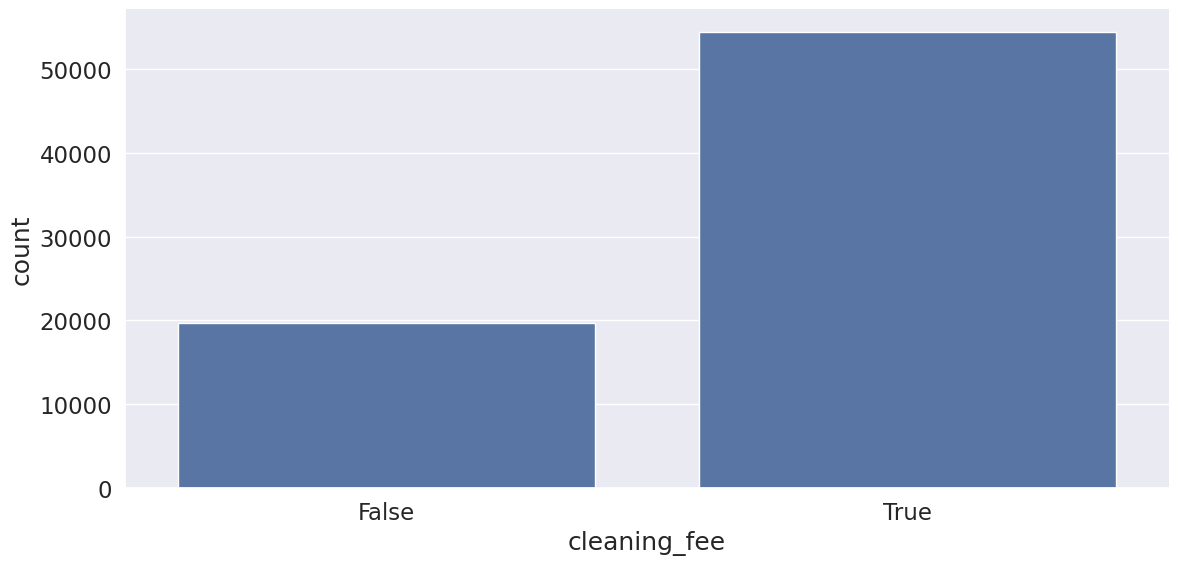

In [33]:
# visualizes no. cleaning fee is applied or not
plot_catplot("cleaning_fee","count",6,2)

In [34]:
def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

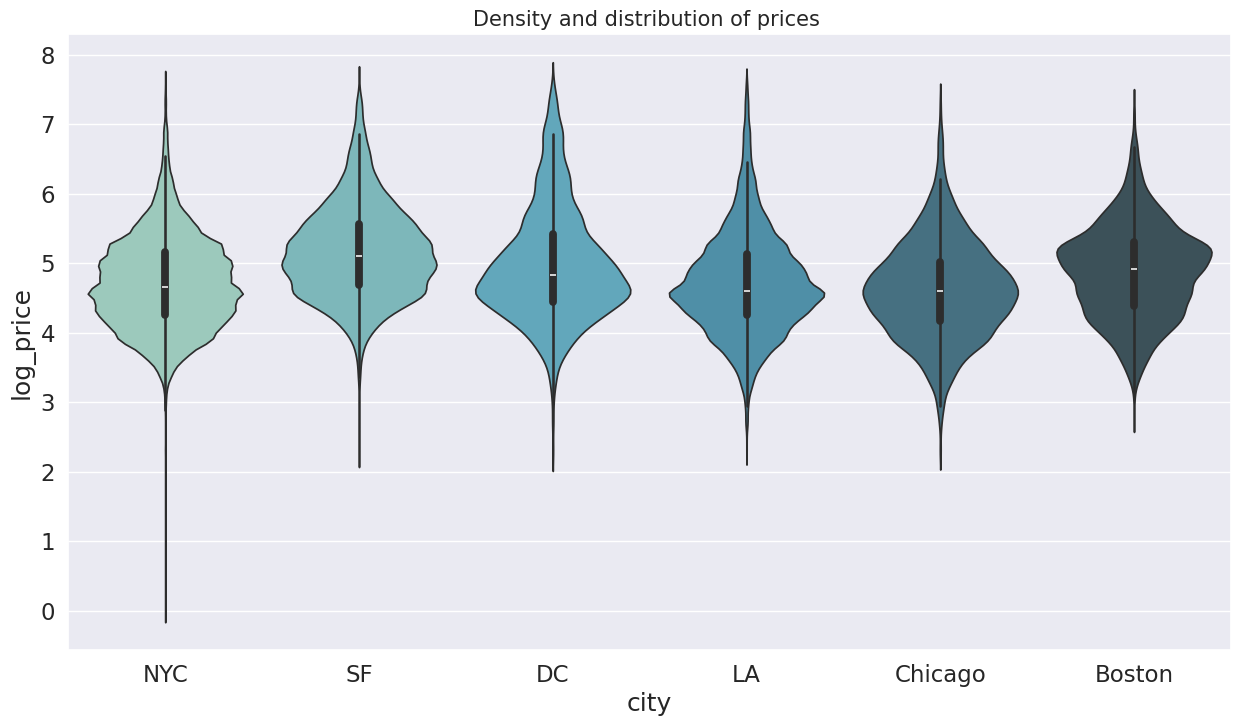

In [35]:
# visualize distribution and density of Airbnb log prices (log_price) across different cities (city)
plot_violinplot("city","log_price")

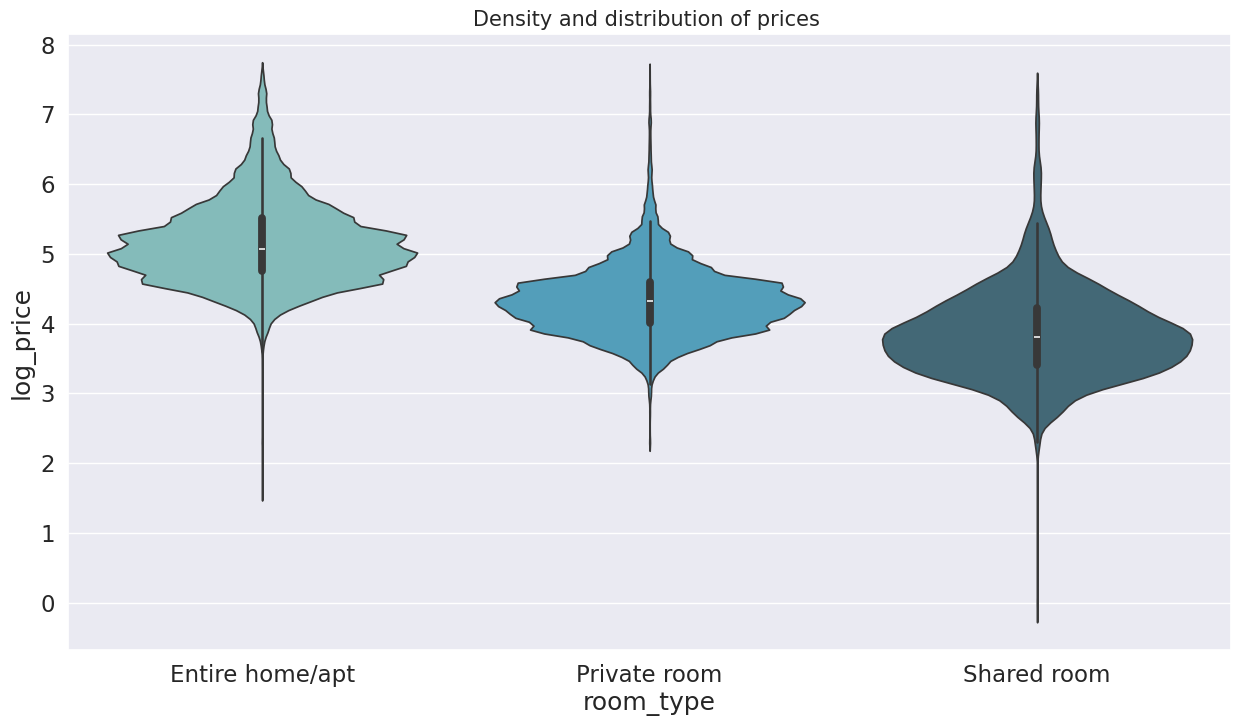

In [36]:
# visualization shows distribution and density of Airbnb prices for each different type of room
plot_violinplot("room_type","log_price")

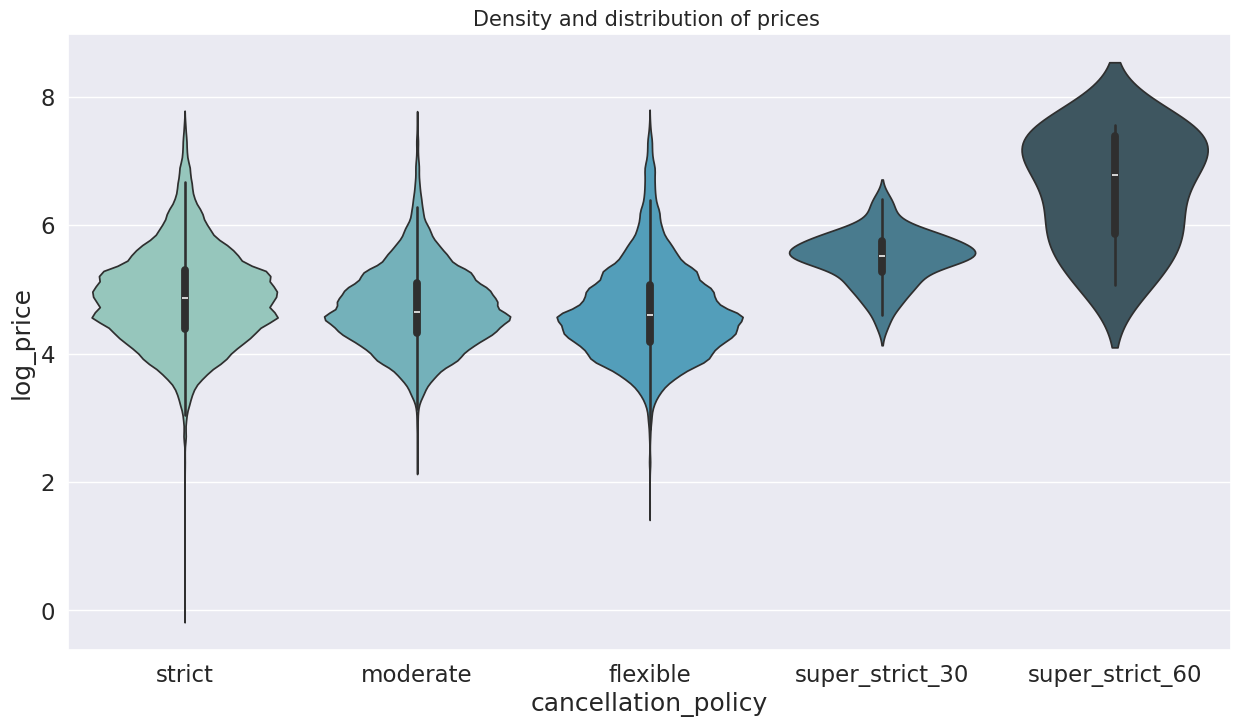

In [37]:
# visualize how Airbnb prices vary across different cancellation policies
plot_violinplot("cancellation_policy","log_price")

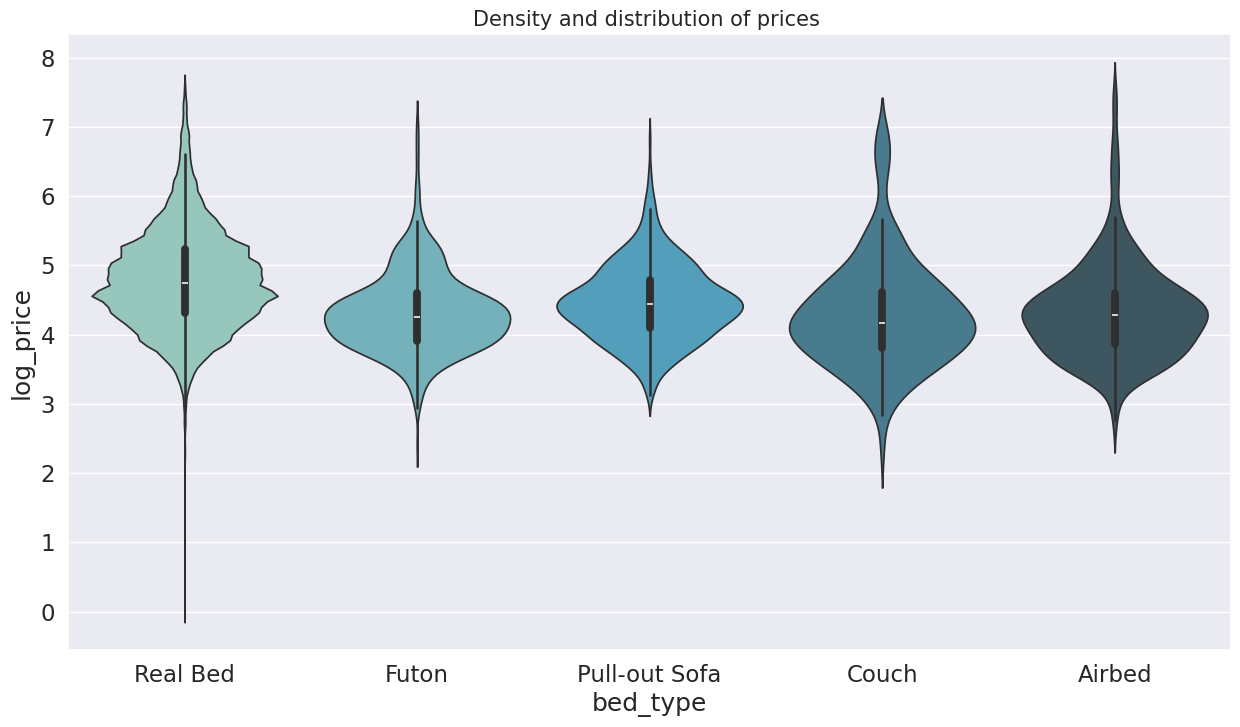

In [38]:
# visualize the relationship between the type of bed offered in an Airbnb listing and the logarithm of its price
plot_violinplot("bed_type","log_price")

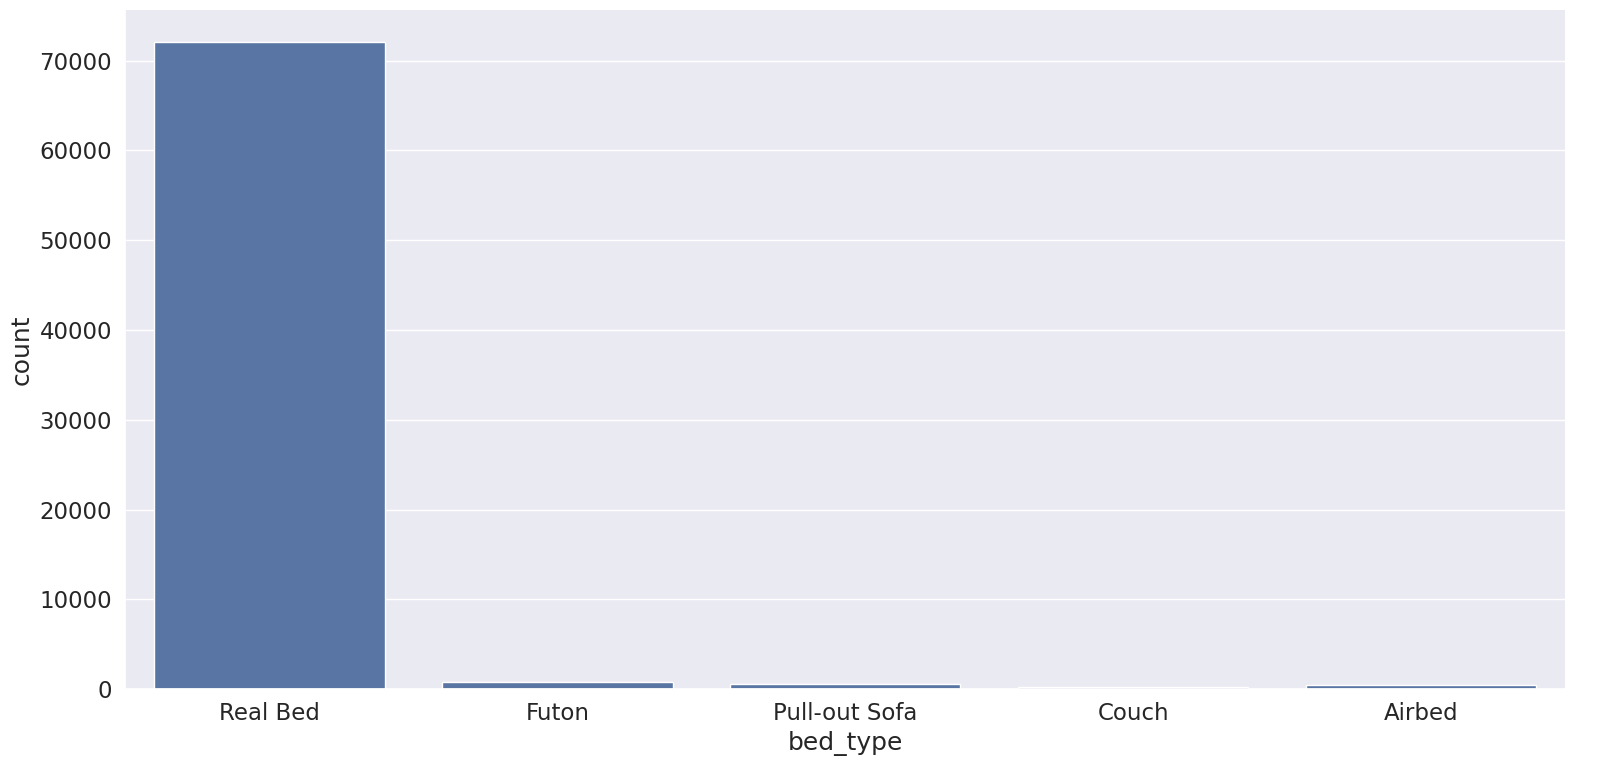

In [39]:
# visualization shows distribution of bed types in the Airbnb dataset
plot_catplot("bed_type","count",8, 2)

In [40]:
# used for loop to divide columns in two categories
categorical_col = []
numerical_col = []
for column in df.columns:

    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categorical_col.append(column)
    else:
        numerical_col.append(column)

In [41]:
# printing the numerical col
numerical_col

['id',
 'log_price',
 'amenities',
 'accommodates',
 'bathrooms',
 'latitude',
 'longitude',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds']

In [42]:
# printing the categorical col
categorical_col

['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

In [43]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
# encoding categorical data
for col in categorical_col:
    df[col] = le.fit_transform(df[col])

In [45]:
# showing all data in your dataset
pd.set_option("display.max_columns",None)
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,0,0,152,3,1.0,4,2,1,4,9953,1481,1,1,80,2549,0,781,40.696524,-73.991617,10375,77,2,100.0,32398,105,1.0,1.0
1,6304928,5.129899,0,0,218,7,1.0,4,2,1,4,19004,406,1,0,2,1866,1,1012,40.766115,-73.989040,65616,252,6,93.0,16220,19,3.0,3.0
2,7919400,4.976734,0,0,311,5,1.0,4,1,1,4,55632,2450,1,1,2,2511,1,610,40.808110,-73.943756,66341,247,10,92.0,32852,26,1.0,3.0
3,13418779,6.620073,17,0,210,4,1.0,4,0,1,5,63080,2450,1,1,80,1846,0,610,37.772004,-122.431619,9296,325,0,0.0,33692,650,2.0,2.0
4,3808709,4.744932,0,0,174,2,1.0,4,1,1,2,15897,966,1,1,2,20,1,933,38.925627,-77.034596,31994,119,4,40.0,65883,210,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,0,1,2,1,1.0,4,0,0,4,72516,2040,1,1,80,2344,0,807,40.709025,-73.939405,72319,605,0,0.0,25229,109,1.0,1.0
74107,13281809,5.043425,0,0,224,4,2.0,4,1,1,3,30728,1240,1,0,2,246,0,635,33.871549,-118.396053,59843,255,16,93.0,13695,425,2.0,4.0
74108,18688039,5.220356,0,0,402,5,1.0,4,1,1,4,4670,179,1,1,2,414,1,428,40.706749,-73.942377,43628,605,43,94.0,37484,109,2.0,2.0
74109,17045948,5.273000,0,0,189,2,1.0,4,2,1,4,21012,179,1,0,2,1692,1,428,40.738535,-74.000157,26369,592,0,0.0,51019,12,0.0,2.0


# HeatMap

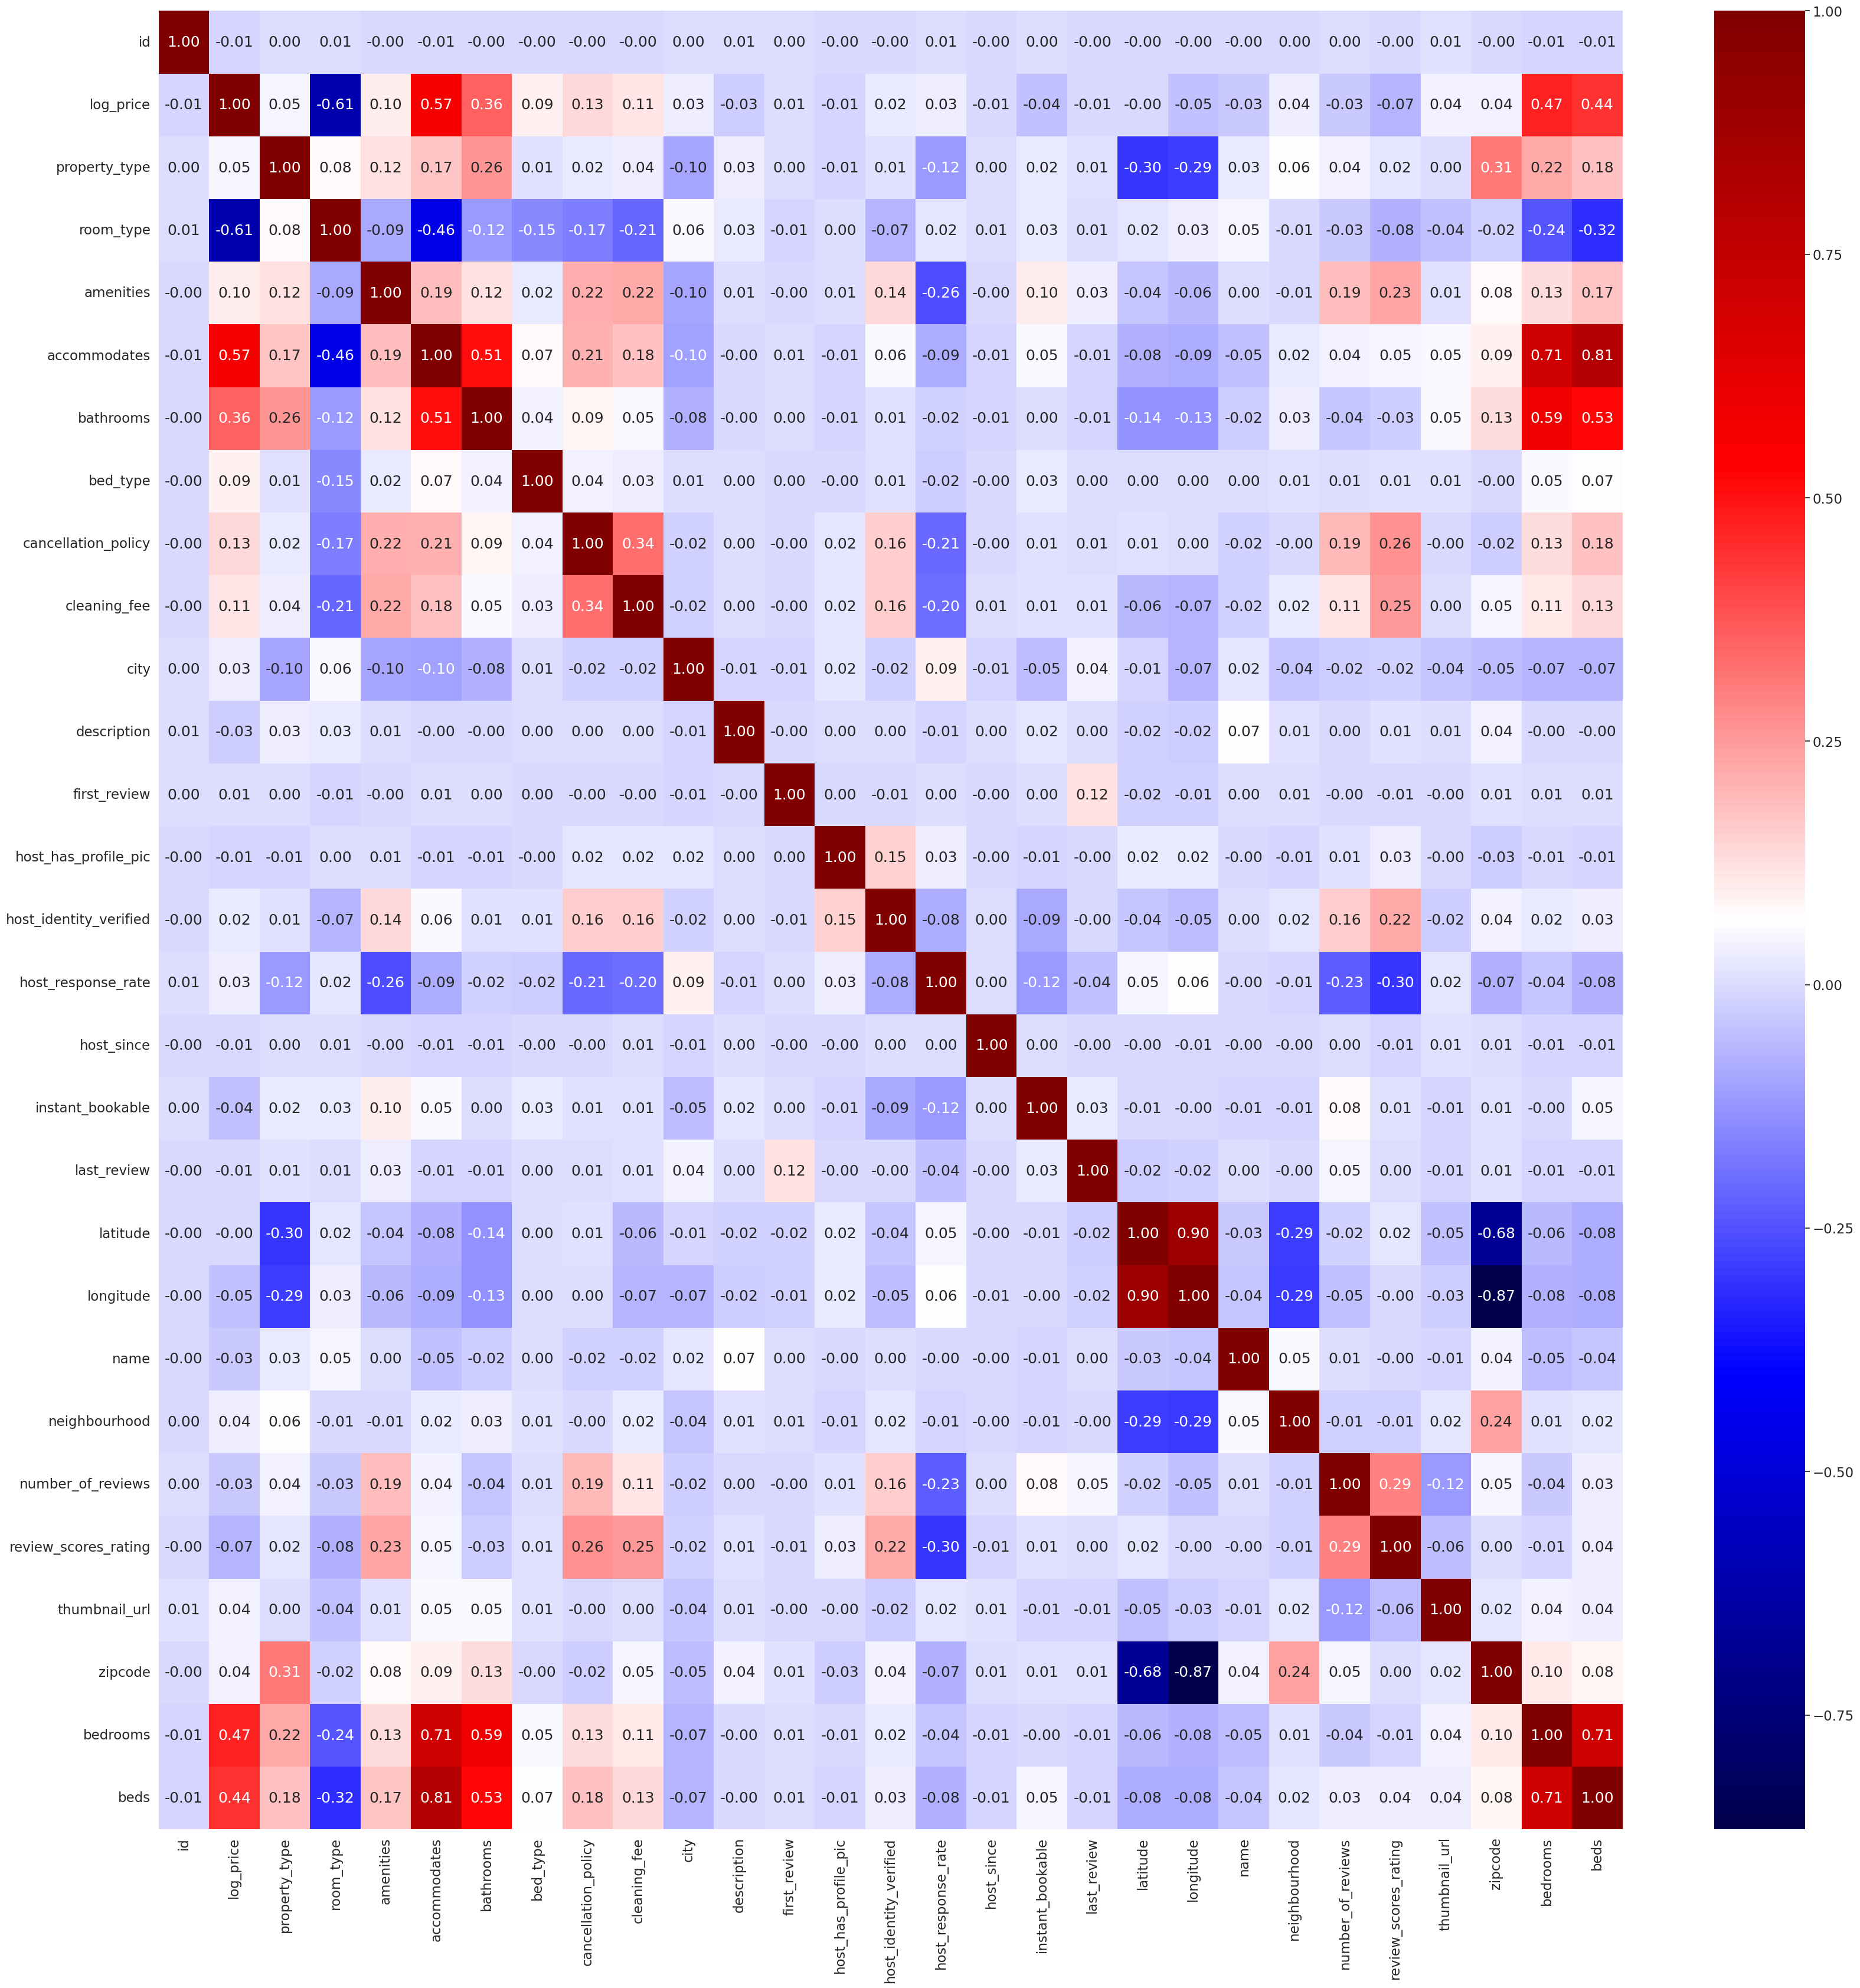

In [46]:
# heatmap visualization for showing correlation between different features
plt.figure(figsize = (40,40))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()

In [47]:
# Feature selection and the target variable definition
x = df.drop(["id","name","log_price","description","first_review","host_since","last_review","neighbourhood",
            "thumbnail_url", "zipcode"],axis = 1)
y = df.log_price

In [48]:
x

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,0,0,152,3,1.0,4,2,1,4,1,1,80,0,40.696524,-73.991617,2,100.0,1.0,1.0
1,0,0,218,7,1.0,4,2,1,4,1,0,2,1,40.766115,-73.989040,6,93.0,3.0,3.0
2,0,0,311,5,1.0,4,1,1,4,1,1,2,1,40.808110,-73.943756,10,92.0,1.0,3.0
3,17,0,210,4,1.0,4,0,1,5,1,1,80,0,37.772004,-122.431619,0,0.0,2.0,2.0
4,0,0,174,2,1.0,4,1,1,2,1,1,2,1,38.925627,-77.034596,4,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,0,1,2,1,1.0,4,0,0,4,1,1,80,0,40.709025,-73.939405,0,0.0,1.0,1.0
74107,0,0,224,4,2.0,4,1,1,3,1,0,2,0,33.871549,-118.396053,16,93.0,2.0,4.0
74108,0,0,402,5,1.0,4,1,1,4,1,1,2,1,40.706749,-73.942377,43,94.0,2.0,2.0
74109,0,0,189,2,1.0,4,2,1,4,1,0,2,1,40.738535,-74.000157,0,0.0,0.0,2.0


In [49]:
y

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932
...,...
74106,4.605170
74107,5.043425
74108,5.220356
74109,5.273000


In [51]:
# Remove outliers beyond 99th percentile
# Assuming 'log_price' contains the logarithm of the price
upper_limit = np.percentile(np.exp(df["log_price"]), 99)  # Calculate the 99th percentile of the actual price
df = df[np.exp(df["log_price"]) < upper_limit] # Filter based on actual price

# Spliting data in train and test split

In [52]:
# spliting data in train and test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

## Model Building

# Linear Regression

In [53]:
lr = LinearRegression()

In [54]:
# training our model
lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

In [55]:
# model evaluation and metrics calculation
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print('\nMean Absolute Error      : ', mae_lr)
print('\nMean Squarred Error      : ', mse_lr)
print('\nRoot Mean Squarred Error : ', rmse_lr)
print('\nR2 Score                 : ', r2_lr)


Mean Absolute Error of Linear Regression     :  0.36870444243901085

Mean Squarred Error of Linear Regression     :  0.23465903966744991

Root Mean Squarred Error of Linear Regression:  0.4844161843574695

R2 Score of Linear Regression                :  0.5468814426430773


# Random Forest

In [56]:
# training model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)


In [57]:
# model evaluation and metrics calculation
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print('\nMean Absolute Error     : ', mae_rf)
print('\nMean Squarred Error     : ', mse_rf)
print('\nRoot Mean Squarred Error: ', rmse_rf)
print('\nR2 Score                : ', r2_rf)


Mean Absolute Error of Random Forest Regressor     :  0.2991322436560514

Mean Squarred Error of Random Forest Regressor     :  0.16567077588179074

Root Mean Squarred Error of Random Forest Regressor:  0.40702675081840844

R2 Score of Random Forest Regressor                :  0.68009541388159


# XGBoost

In [58]:
# training model
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=7, colsample_bytree=0.8, random_state=42)


In [59]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [60]:
y_pred_xgb = xgb.predict(x_test)

In [61]:
# model evaluation and metrics calculation
mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor")
print('\nMean Absolute Error     : ', mae_xgb)
print('\nMean Squarred Error     : ', mse_xgb)
print('\nRoot Mean Squarred Error: ', rmse_xgb)
print('\nR2 Score                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  0.2800150068546817

Mean Squarred Error of XGBoost Regressor     :  0.14756790337295625

Root Mean Squarred Error of XGBoost Regressor:  0.3841456798832394

R2 Score of XGBoost Regressor                :  0.715051439811143


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)  # You can tune max_depth

# Train the model
dt_model.fit(x_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(x_test)

# Evaluate the model
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Print results
print("Decision Tree")
print('\nMean Absolute Error : ', mae_dt)
print('\nMean Squarred Error : ', mse_dt)
print('\nRoot Mean Squarred Error: ', rmse_dt)
print('\nR2 Score: ', r2_dt)


Decision Tree R² Score: 0.632492
Decision Tree Mean Absolute Error: 0.318353
Decision Tree Mean Squared Error: 0.190323
Decision Tree Root Mean Squared Error: 0.436261


In [63]:
# used to store the models results
r2_list = {"Linear Regression": r2_lr,
          "Random Forest": r2_xgb ,
          "XGBoost": r2_xgb ,
           "Descision Tree": r2_dt}

mae_list = {"Linear Regression": mae_lr,
          "Random Forest": mae_xgb ,
          "XGBoost": mae_xgb ,
          "Descision Tree": mae_dt}

mse_list = {"Linear Regression": mse_lr,
          "Random Forest": mse_xgb ,
          "XGBoost": mse_xgb ,
          "Descision Tree": mse_dt}

rmse_list = {"Linear Regression": rmse_lr,
          "Random Forest": rmse_xgb ,
          "XGBoost": rmse_xgb ,
          "Descision Tree": rmse_dt}


In [64]:

a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
a2 =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
a3 =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
a4 =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])

In [65]:
# summarizes the performance of different ml models to compare their results
org = pd.concat([a1, a2, a3, a4], axis = 1)
org

,R2 SCORE,MEAN ABSOLUTE ERROR,MEAN SQUARRED ERROR,ROOT MEAN SQUARRED ERROR
Linear Regression,0.546881,0.368704,0.234659,0.484416
Random Forest,0.715051,0.280015,0.147568,0.384146
XGBoost,0.715051,0.280015,0.147568,0.384146
Descision Tree,0.632492,0.318353,0.190323,0.436261


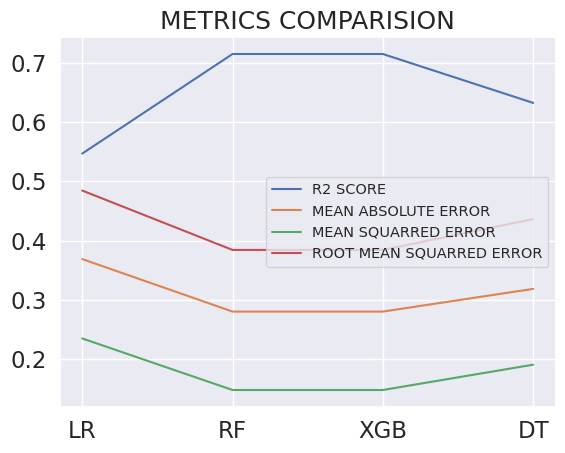

In [67]:
# visualizes the performance of four different regression models using a line plot
alg = ['LR','RF','XGB','DT']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
legend = ["R2 SCORE", "MEAN ABSOLUTE ERROR", "MEAN SQUARRED ERROR", "ROOT MEAN SQUARRED ERROR"]

plt.title("METRICS COMPARISION")
plt.legend(legend, loc= 'right', fontsize='xx-small')
plt.show()

## Hyperparameter Tuning to increase the performance of models

In [68]:
# ✅ Hyperparameter Grid for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [69]:
rf = RandomForestRegressor(random_state=42)

In [70]:
from sklearn.model_selection import RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, rf_params, n_iter=20,cv=5, n_jobs=-1, verbose=1)

In [71]:
rf_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=1)

In [72]:
# Get the best Random Forest model after tuning
best_rf = rf_search.best_estimator_


In [73]:
# Predict on test data
y_pred_rf_tuned = best_rf.predict(x_test)

# Calculate performance metrics
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)

# Print results
print("Best Random Forest Model after Tuning: ")
print(f"R² Score: {r2_rf_tuned:.6f}")
print(f"Mean Absolute Error (MAE): {mae_rf_tuned:.6f}")
print(f"Mean Squared Error (MSE): {mse_rf_tuned:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_tuned:.6f}")


Best Random Forest Model after Tuning: 
R² Score: 0.704932
Mean Absolute Error (MAE): 0.281626
Mean Squared Error (MSE): 0.152809
Root Mean Squared Error (RMSE): 0.390907


In [74]:
# ✅ Hyperparameter Grid for XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

In [75]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

In [76]:
xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=20, cv=5, scoring = 'r2', n_jobs=-1, verbose=1)

In [77]:
xgb_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   scoring='r2', verbose=1)

In [78]:
best_xgb = xgb_search.best_estimator_

In [79]:
print("Best XBGoost Parameters:", xgb_search.best_params_)
print(best_xgb)

Best XBGoost Parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [80]:
y_pred_xgb_tuned = best_xgb.predict(x_test)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mse_xgb_tuned)

# Print results
print("Best XGBoost Model after Tuning: ")
print(f"R² Score: {r2_xgb_tuned:.6f}")
print(f"Mean Absolute Error (MAE): {mae_xgb_tuned:.6f}")
print(f"Mean Squared Error (MSE): {mse_xgb_tuned:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_tuned:.6f}")

Best XGBoost Model after Tuning: 
R² Score: 0.720359
Mean Absolute Error (MAE): 0.276271
Mean Squared Error (MSE): 0.144819
Root Mean Squared Error (RMSE): 0.380551


In [81]:
r2_list = {"Random Forest": r2_rf_tuned ,
          "XGBoost": r2_xgb_tuned}

mae_list = {"Random Forest": mae_rf_tuned ,
          "XGBoost": mae_xgb_tuned}

mse_list = {"Random Forest": mse_rf_tuned ,
          "XGBoost": mse_xgb_tuned}

rmse_list = {"Random Forest": rmse_rf_tuned ,
          "XGBoost": rmse_xgb_tuned}


In [82]:
a1_updated =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
a2_updated =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
a3_updated =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
a4_updated =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])

In [83]:
org = pd.concat([a1_updated, a2_updated, a3_updated, a4_updated], axis = 1)
org

,R2 SCORE,MEAN ABSOLUTE ERROR,MEAN SQUARRED ERROR,ROOT MEAN SQUARRED ERROR
Random Forest,0.704932,0.281626,0.152809,0.390907
XGBoost,0.720359,0.276271,0.144819,0.380551


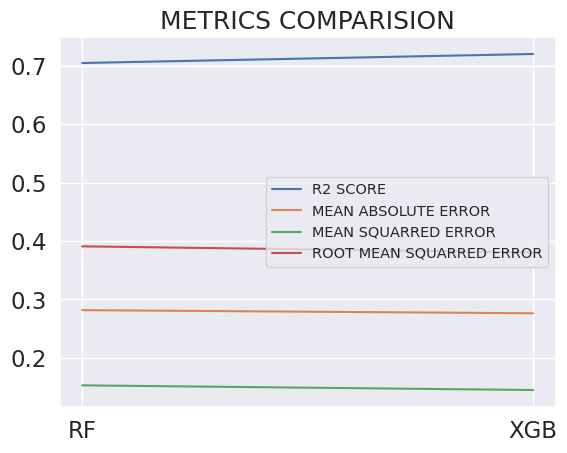

In [84]:
alg = ['RF','XGB']
plt.plot(alg,a1_updated)
plt.plot(alg,a2_updated)
plt.plot(alg,a3_updated)
plt.plot(alg,a4_updated)
legend = ["R2 SCORE", "MEAN ABSOLUTE ERROR", "MEAN SQUARRED ERROR", "ROOT MEAN SQUARRED ERROR"]

plt.title("METRICS COMPARISION")
plt.legend(legend, loc= 'right', fontsize='xx-small')
plt.show()

## **Saving our best model**

In [85]:
import pickle

In [86]:
# saving best model
filename = 'Best_Model.sav'
pickle.dump(best_xgb, open(filename,'wb'))

In [87]:
# loading the best model
load_model = pickle.load(open(filename, 'rb'))

In [88]:
# model score
load_model.score(x_test, y_test)

0.7203587477694915

## Testing the model on new data, to check its performance.

In [89]:
# Predict on new data
import pandas as pd
new_data = pd.DataFrame({
    'property_type': ['Apartment'],
    'room_type': ['Entire home/apt'],
    'accommodates': [3],
    'bathrooms': [1.0],
    'bed_type': ['Real Bed'],
    'cancellation_policy': ['flexible'],
    'cleaning_fee': [True],
    'city': ['New York'],
    'instant_bookable': ['t'],
    'latitude': [40.7128],
    'longitude': [-74.0060],
    'beds': [2],
    'bedrooms': [1],
    'number_of_reviews': [5],
    'review_scores_rating': [95.0],
    'amenities': [10], # Assuming transformed to count
    'host_has_profile_pic': [True], # Add missing columns
    'host_identity_verified': [True], # Add missing columns
    'host_response_rate': [100]
})

# --- Preprocessing for new_data ---
categorical_features = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'instant_bookable']

# Create a LabelEncoder for each categorical feature
encoders = {}
for feature in categorical_features:
    encoders[feature] = LabelEncoder()
    # Fit the encoder on the training data OR on the combined unique values from training and new data
    # Here, assuming 'df' is your original training DataFrame
    combined_values = list(df[feature].unique()) + list(new_data[feature].unique())
    encoders[feature].fit(combined_values)

# Transform categorical features in new_data using the fitted encoders
for feature in categorical_features:
    new_data[feature] = encoders[feature].transform(new_data[feature])

new_data = new_data[['property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type',
                    'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic',
                    'host_identity_verified', 'host_response_rate', 'instant_bookable', 'latitude',
                    'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']]

# Ensure the new data matches the training format
new_pred = load_model.predict(new_data)
print("Prediction for new data:", new_pred)

actual_price = np.exp(new_pred[0])
print("Actual Price:", actual_price)

Prediction for new data: [5.080783]
Actual Price: 160.89998


In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'y_new' contains the true values for your new data point (if available)
y_new = [5.0]  # Example: Replace with actual true value for 'new_data'

# Calculate metrics for the single new data point
mae = mean_absolute_error(y_new, new_pred)  # Compare with true value for new data
mse = mean_squared_error(y_new, new_pred)    # Compare with true value for new data
rmse = np.sqrt(mse)                          # Compare with true value for new data

# Print the results
print(f"Predicated Model Evaluation Metrics for New Data Point:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# If you want to evaluate the model's performance on the original test set,
# use the predictions made on the test set (e.g., 'y_pred_xgb_tuned' from your code):
mae_test = mean_absolute_error(y_test, y_pred_xgb_tuned)
mse_test = mean_squared_error(y_test, y_pred_xgb_tuned)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_xgb_tuned)

print("\nModel Evaluation Metrics on Original Test Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R² Score: {r2_test:.4f}")

Predicated Model Evaluation Metrics for New Data Point:
MAE: 0.08
MSE: 0.01
RMSE: 0.08

Model Evaluation Metrics on Original Test Set:
MAE: 0.28
MSE: 0.14
RMSE: 0.38
R² Score: 0.7204


## Testing on User Input

In [96]:
import numpy as np
import pandas as pd
import pickle

# Load the trained model
with open('Best_Model.sav', 'rb') as model_file:
    model = pickle.load(model_file)

# Function to take user input
def get_user_input():
    print("\nEnter details for Airbnb Price Prediction:\n")

    property_type = input("Property Type (e.g., Apartment, House, Condo): ")
    room_type = input("Room Type (e.g., Entire home/apt, Private room, Shared room): ")
    amenities = int(input("Number of Amenities: "))
    accommodates = int(input("Accommodates (Number of Guests): "))
    bathrooms = float(input("Number of Bathrooms: "))
    bed_type = input("Bed Type (e.g., Real Bed, Futon, Airbed): ")
    cancellation_policy = input("Cancellation Policy (e.g., flexible, moderate, strict): ")
    cleaning_fee = bool(input("Cleaning Fee (Enter 0 if not applicable): "))
    city = input("City: ")
    host_has_profile_pic = int(input("Host Has Profile Pic? (1 for Yes, 0 for No): "))
    host_identity_verified = int(input("Host Identity Verified? (1 for Yes, 0 for No): "))
    host_response_rate = float(input("Host Response Rate (0-100): "))
    instant_bookable = int(input("Instant Bookable? (1 for Yes, 0 for No): "))
    latitude = float(input("Latitude: "))
    longitude = float(input("Longitude: "))
    number_of_reviews = int(input("Number of Reviews: "))
    review_scores_rating = float(input("Review Score Rating (0-100): "))
    bedrooms = int(input("Number of Bedrooms: "))
    beds = int(input("Number of Beds: "))

    # Convert input to a DataFrame
    user_data = pd.DataFrame([[
        property_type, room_type, amenities, accommodates, bathrooms, bed_type,
        cancellation_policy, cleaning_fee, city, host_has_profile_pic, host_identity_verified,
        host_response_rate, instant_bookable, latitude, longitude, number_of_reviews,
        review_scores_rating, bedrooms, beds
    ]], columns=[
        "property_type", "room_type", "amenities", "accommodates", "bathrooms", "bed_type",
        "cancellation_policy", "cleaning_fee", "city", "host_has_profile_pic", "host_identity_verified",
        "host_response_rate", "instant_bookable", "latitude", "longitude", "number_of_reviews",
        "review_scores_rating", "bedrooms", "beds"
    ])

    return user_data

# Get user input
new_data = get_user_input()

# Preprocess input (Encoding categorical values, handling missing data, etc.)
encoder = LabelEncoder()
# Ensure `new_data` is in the same format as training data
# Example encoding (Modify as per your dataset preprocessing steps)
# new_data['property_type'] = label_encoder.transform(new_data['property_type'])
# (Apply all necessary transformations before prediction)

# Encode categorical columns to encode
categorical_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']

# Encode categorical columns
for col in categorical_columns:
    new_data[col] = encoder.fit_transform(new_data[col])

# Predict Price
predicted_price = model.predict(new_data)
print(f"\nPredicted Airbnb Price: ${predicted_price[0]:.2f}")
print(f"Actual Price: ${np.exp(predicted_price[0]):.2f}")



Enter details for Airbnb Price Prediction:

Property Type (e.g., Apartment, House, Condo): Apartment
Room Type (e.g., Entire home/apt, Private room, Shared room): Entire home/apt
Number of Amenities: 10
Accommodates (Number of Guests): 3
Number of Bathrooms: 1.0
Bed Type (e.g., Real Bed, Futon, Airbed): Real bed
Cancellation Policy (e.g., flexible, moderate, strict): flexible
Cleaning Fee (Enter 0 if not applicable): true
City: New York
Host Has Profile Pic? (1 for Yes, 0 for No): 1
Host Identity Verified? (1 for Yes, 0 for No): 1
Host Response Rate (0-100): 100
Instant Bookable? (1 for Yes, 0 for No): 1
Latitude: 40.7128
Longitude: -74.0060
Number of Reviews: 5
Review Score Rating (0-100): 95.0
Number of Bedrooms: 1
Number of Beds: 2

Predicted Airbnb Price: $4.90
Actual Price: $133.84


In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'y_new' contains the true values for your new data point (if available)
# Replace this with the actual true value for your new data
y_new = [5.0]  # Example: Replace with actual true value for 'new_data'

# Calculate metrics for the single new data point
mae = mean_absolute_error(y_new, new_pred)  # Compare with true value for new data
mse = mean_squared_error(y_new, new_pred)    # Compare with true value for new data
rmse = np.sqrt(mse)                          # Compare with true value for new data

# Print the results
print(f"Predicated Model Evaluation Metrics for New Data Point:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# If you want to evaluate the model's performance on the original test set,
# use the predictions made on the test set (e.g., 'y_pred_xgb_tuned' from your code):
mae_test = mean_absolute_error(y_test, y_pred_xgb_tuned)
mse_test = mean_squared_error(y_test, y_pred_xgb_tuned)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_xgb_tuned)

print("\nModel Evaluation Metrics on Original Test Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R² Score: {r2_test:.4f}")

Predicated Model Evaluation Metrics for New Data Point:
MAE: 0.08
MSE: 0.01
RMSE: 0.08

Model Evaluation Metrics on Original Test Set:
MAE: 0.28
MSE: 0.14
RMSE: 0.38
R² Score: 0.7204


## ****Video Link****

https://drive.google.com/file/d/1GmpPHWD9U1QHEUGireky3iMsUOE_unjA/view?usp=sharing